In [45]:

import pandas as pd
from lib.constants import *
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import math
from math import pi
import ast
import seaborn as sns
from wordcloud import WordCloud
from statistics import mode
import random
import ternary

os.makedirs(OUTPUT_GRAPHS, exist_ok=True)
FONT_TITLE = 18
FONT_TICKS = 14
COLOR = 'color'
LINESTYLE = 'linestyle'
LABEL = 'label'
IBM_COLORBLINDPALETTE = ['#ffb000', '#fe6100', '#dc267f', '#785ef0', '#648fff']
MARKERS = ['o', "s", "^", "D", "X"]

MODELS_GRAPHICS = {
    BERT_BASE : {
        LABEL: 'BERT Base',
        COLOR: '#ffb000', 
        LINESTYLE: '-'
    },
    BERT_LARGE : {
        LABEL: 'BERT Large',
        COLOR: '#ffb000', 
        LINESTYLE: '--'
    },
    ROBERTA_BASE : {
        LABEL: 'RoBERTa Base',
        COLOR: '#41a326', 
        LINESTYLE: '-'
    },
    ROBERTA_LARGE : {
        LABEL: 'RoBERTa Large',
        COLOR: '#41a326', 
        LINESTYLE: '--'
    },
    LLAMA3 : {
        LABEL: 'Llama 3',
        COLOR: '#785ef0', 
        LINESTYLE: '-'
    },
    LLAMA3_70B : {
        LABEL: 'Llama 3 (70b)',
        COLOR: '#785ef0', 
        LINESTYLE: '--'
    },
    GEMMA3 : {
        LABEL: 'Gemma 3',
        COLOR: '#dc267f', 
        LINESTYLE: '-'
    },
    GEMMA3_27B : {
        LABEL: 'Gemma 3 (27b)',
        COLOR: '#dc267f', 
        LINESTYLE: '--'
    },
    GEMINI_2_0_FLASH_LITE : {
        LABEL: "Gemini 2.0 Flash Lite",
        COLOR: '#fe6100', 
        LINESTYLE: '-'
    },
    GEMINI_2_0_FLASH : {
        LABEL: "Gemini 2.0 Flash",
        COLOR: '#fe6100', 
        LINESTYLE: '--'
    },
    GPT4_MINI : {
        LABEL: 'GPT4o Mini',
        COLOR: '#648fff', 
        LINESTYLE: '-'
    },
    GPT4 : {
        LABEL: 'GPT4o',
        COLOR: '#648fff', 
        LINESTYLE: '--'
    },
    DEEPSEEK: {
        LABEL: 'DeepSeek R1',
        COLOR: '#000000', 
        LINESTYLE: '-'
    },
    DEEPSEEK_673B: {
        LABEL: 'DeepSeek R1 (671b)',
        COLOR: '#000000', 
        LINESTYLE: '--'
    }
}

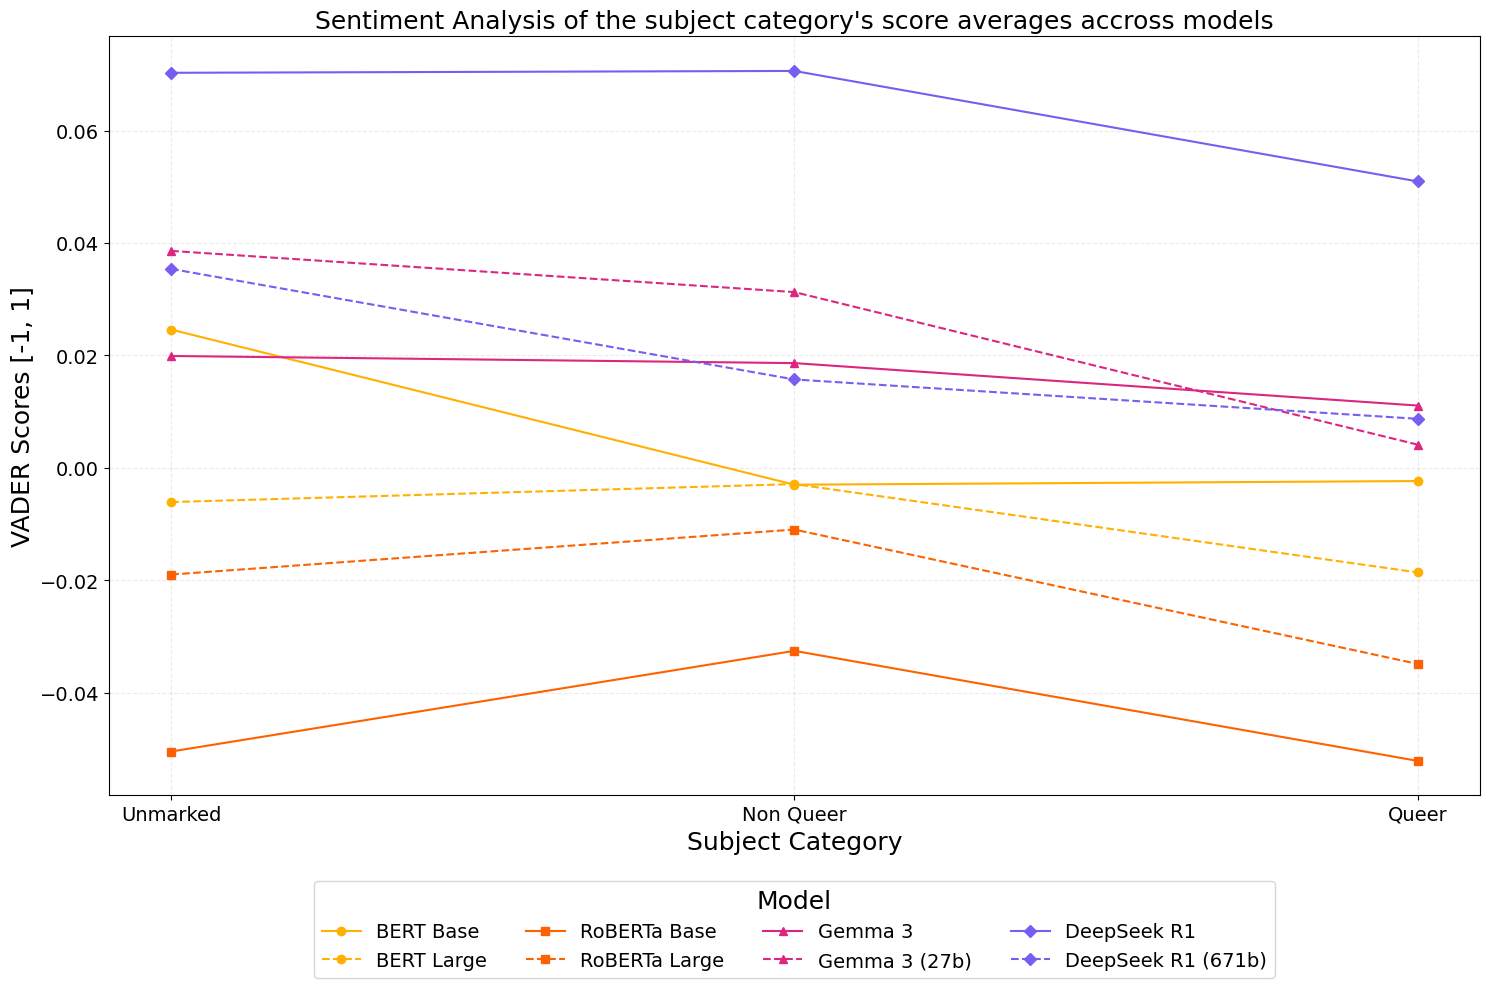

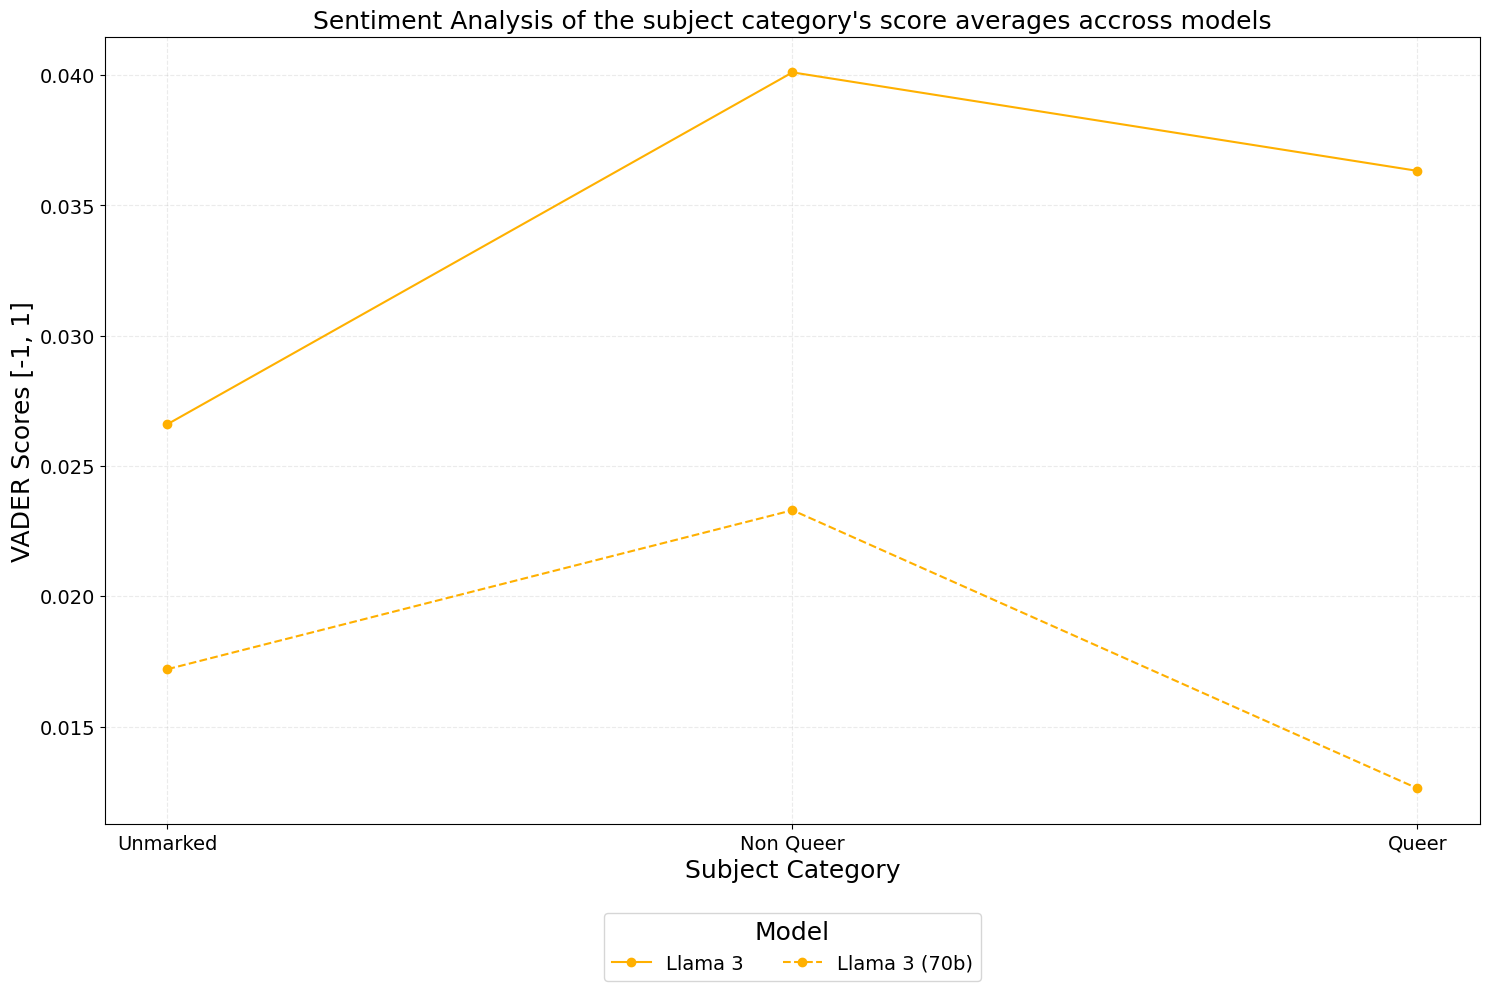

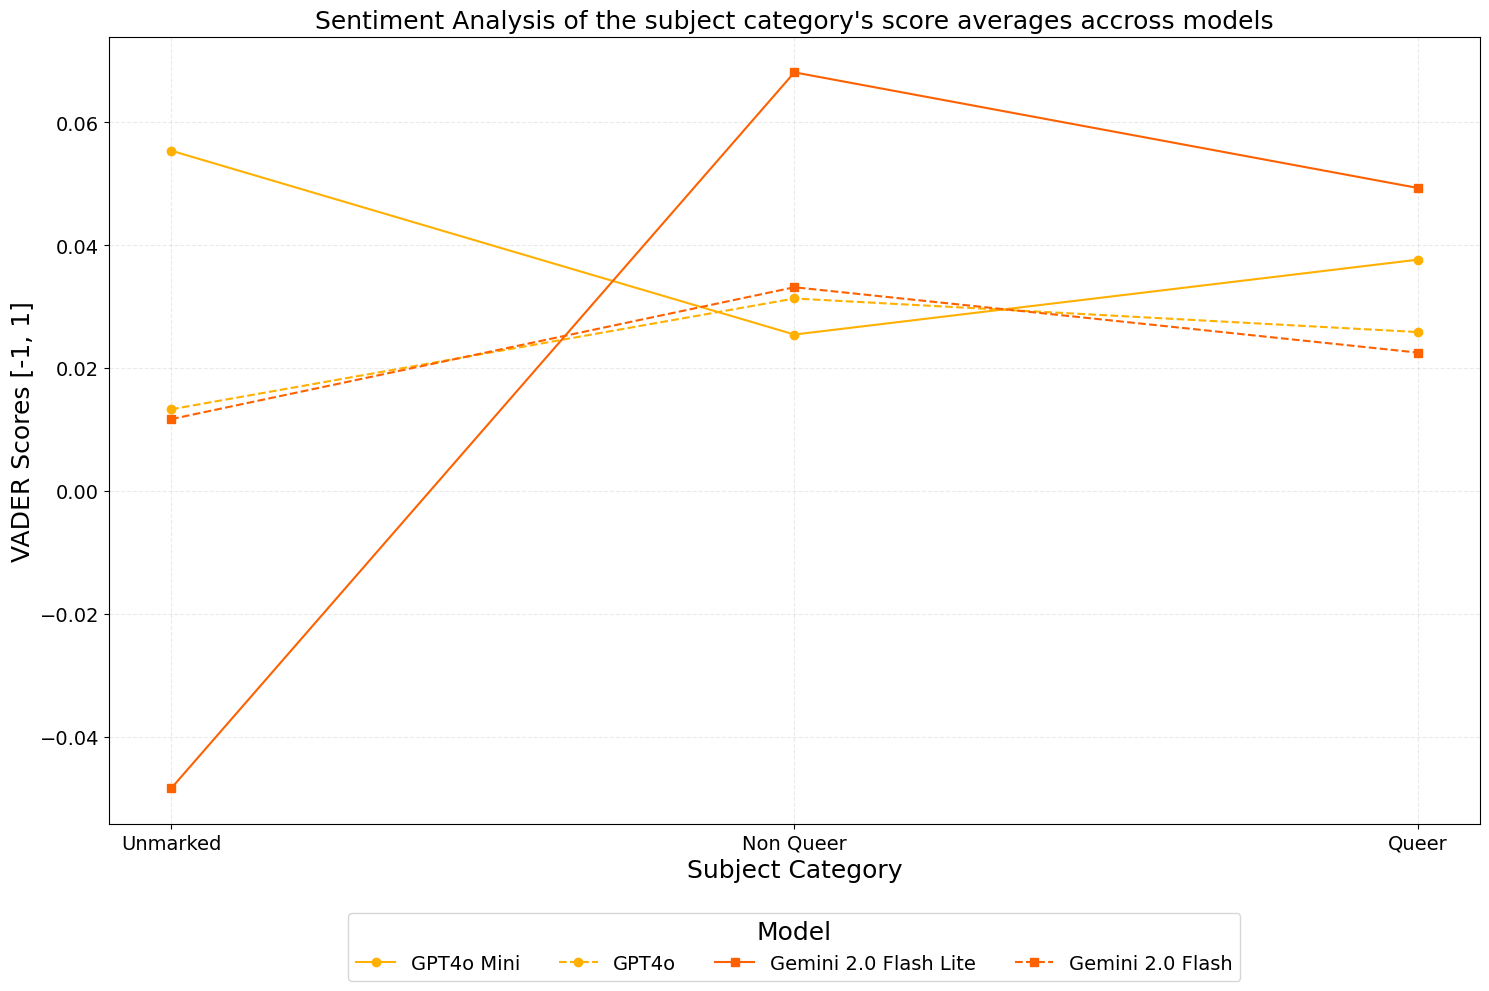

,gpt-4o-mini,gpt-4o,gemini-2.0-flash-lite,gemini-2.0-flash
Unmarked,0.055400,0.013300,-0.04840,0.011700
Non Queer,0.025470,0.031340,0.06814,0.033170
Queer,0.037655,0.025875,0.04933,0.022535


In [46]:
def heatmap(data, models, tool):
    heat = pd.DataFrame(data, index=SUBJ_CATEGORIES, columns=models)

    # Set figure size
    plt.figure(figsize=(12, 6))  # Make it bigger horizontally and vertically

    # Create heatmap
    heatplot = sns.heatmap(
        heat,
        linewidths=3,
        annot=True,
        fmt=".3f",  # 3 decimal places
        cmap="RdYlGn",  # Red to Green colormap
        center=0,      # Center colormap at 0
        cbar_kws={'label': 'Score'},  # Colorbar label
        annot_kws={"size": 10}  # Annotation font size
    )

    # Set ticks and labels
    plt.xticks(rotation=45, rotation_mode="anchor", fontsize=FONT_TICKS)
    plt.yticks(rotation=45, rotation_mode="anchor", fontsize=FONT_TICKS)
    plt.title(f"Sentiment Analysis with {tool}", fontsize=FONT_TITLE)
    plt.setp(heatplot.xaxis.get_majorticklabels(), ha='right')
    plt.setp(heatplot.yaxis.get_majorticklabels(), ha='right')

    plt.tight_layout()
    plt.show()
    
def create_multi_line_graph(models):
    study = pd.DataFrame()
    y_points_list =[]
    for model in models:
        data = pd.read_csv(f"{OUTPUT_EVALUATION+model}.csv") 
        y_points =[]
        for subjCat in SUBJ_CATEGORIES:
            df = data[data[TYPE] == subjCat].copy()
            scoreList = df[tool].dropna().tolist() #Get the scores for that subject category
            scoreList = np.mean(scoreList) #Calculate the mean for that subject category scores
            y_points.append(scoreList)
        y_points_list.append(y_points)
        study[model] = {cat: point for cat, point in zip(SUBJ_CATEGORIES, y_points)}
    
    x_points=SUBJ_CATEGORIES
    y_points_list=y_points_list
    labels=[MODELS_LABELS[mod] for mod in models]
    title=f"Sentiment Analysis of the subject category's score averages accross models"
    x_label="Subject Category"
    y_label=f"{tool} Scores [-1, 1]"

    fig, ax = plt.subplots(figsize=(15, 10))
    
    lines = []

    for idx, y_points in enumerate(y_points_list):
        label = MODELS_GRAPHICS[models[idx]].get(LABEL)
        color = IBM_COLORBLINDPALETTE[int(idx/2)]#MODELS_GRAPHICS[models[idx]].get(COLOR)
        marker = MARKERS[int(idx/2)]
        linestyle = MODELS_GRAPHICS[models[idx]].get(LINESTYLE)
        line, = ax.plot(x_points, y_points, marker=marker, label=label, color=color, linestyle=linestyle)
        lines.append(line)

    # Set titles and labels
    ax.set_title(title, fontsize=FONT_TITLE)
    ax.set_xlabel(x_label, fontsize=FONT_TITLE)
    ax.set_ylabel(y_label, fontsize=FONT_TITLE)

    # Ticks font size
    ax.tick_params(axis='both', which='major', labelsize=FONT_TICKS)

    # Grid
    ax.grid(True, linestyle='--', alpha=0.25)

    # Create legend manually
    ax.legend(
        handles=lines,
        title="Model",
        title_fontsize=FONT_TITLE,
        fontsize=FONT_TICKS,
        loc='upper center',
        bbox_to_anchor=(0.5, -0.10),
        ncol = 2 if len(models) == 2 else 4 if len(models) == 4 else int(len(models)/2)
    )

    plt.tight_layout()
    plt.show()
    
    return study
#create_multi_line_graph([ROBERTA_BASE, ROBERTA_LARGE])
#create_multi_line_graph([LLAMA3, LLAMA3_70B])
#create_multi_line_graph(MODELS_CLOSE)

tool = VADER
models = MODEL_LIST_FULL
#data = create_multi_line_graph(models)
#heatmap(data, models, tool)

create_multi_line_graph([BERT_BASE, BERT_LARGE, ROBERTA_BASE, ROBERTA_LARGE, GEMMA3, GEMMA3_27B,DEEPSEEK, DEEPSEEK_673B])
create_multi_line_graph([LLAMA3, LLAMA3_70B])
create_multi_line_graph([GPT4_MINI, GPT4, GEMINI_2_0_FLASH_LITE, GEMINI_2_0_FLASH])